In [2]:
import numpy as np
import matplotlib.pyplot as plt
try:
    plt.style.use("jupyter")
except OSError:
    print("Using default ploting style")

In [3]:
N = 1024
x = np.linspace(0, 2*np.pi, N, endpoint=False)
# Taylor-Green flow
u = np.cos(x)
v = -np.sin(x)

Two sets of real data $u_j$ and $v_j$, with $j=0, 1, \cdots, N-1$, can be efficiently transformed to Fourier space [see]() using a single complex by transform by defining a complex array

$$
    z = u + iv
$$

In [4]:
z = u + 1j*v

This array is then transformed to Fourier-space, and the full transform can be reconstructed as

$$
\begin{split}
    \tilde{u} &= \frac{1}{2}(\tilde{z}_k + \bar{\tilde{z}}_{-k})\\
    \tilde{v} &= -\frac{i}{2}(\tilde{z}_k - \bar{\tilde{z}}_{-k})\\
\end{split}
\qquad k=0,1,\cdots, \frac{N}{2}-1
$$

The Fourier coefficients of real data for negative $k$ are related to those for positive $k$ by $\tilde{u}_{−k}=\bar{\tilde{u}}_{k}$. This

In [5]:
z_t = np.fft.fft(z)
nk = int(N/2)
u_t = 0.5 * (z_t[:nk] + np.conj(z_t[nk:]))
v_t = -.5j * (z_t[:nk] - np.conj(z_t[nk:]))

If we only seek derivaive of both field (w.r.t the same variable!) we don't even need to separate the data, we can simply do

$$
    \frac{du}{dx}\vert_j + i\frac{dv}{dx}\vert_j = \sum_{-N/2}^{N/2-1} ik\tilde{z}
$$

such that we simply need to multiply is by the complex wave number $ik$ and transfom back to physcal space and separate the data.

In [6]:
kx = np.fft.fftfreq(N, 1./N)
dzdx = np.fft.ifft(1j*kx*z_t)
dudx = np.real(dzdx)
dvdx = np.imag(dzdx)

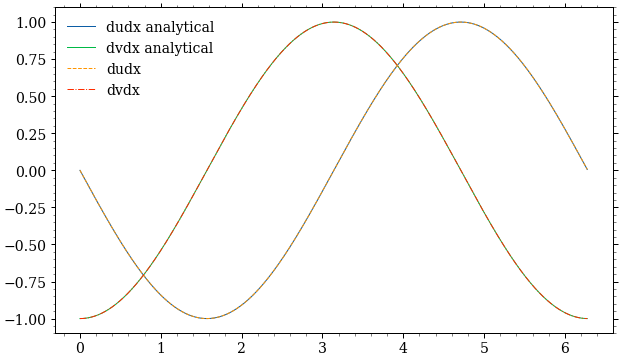

In [7]:
plt.plot(x, -np.sin(x), label='dudx analytical')
plt.plot(x, -np.cos(x), label='dvdx analytical')
plt.plot(x, dudx, '--', label='dudx')
plt.plot(x, dvdx, '-.', label='dvdx')
plt.legend();

In [8]:
print(np.allclose(dudx, -np.sin(x)))
print(np.allclose(dvdx, -np.cos(x)))

True
True


As expected they are exaclty the same! But how does this preformes in terms of computational time?

In [9]:
def ddx_spectral(f):
    N = int(len(f)/2)+1
    f_t = np.fft.rfft(f)
    kx = np.fft.fftfreq(N, 1./N)
    dfdx = np.fft.irfft(1j*kx*f_t)
    return dfdx

In [15]:
def ddx_twice(u, v):
    dudx = ddx_spectral(u)
    dvdx = ddx_spectral(v)
    return dudx, dvdx

In [10]:
def ddx_orzag(u, v):
    z = u + 1j*v
    N = len(z)
    kx = kx = np.fft.fftfreq(N, 1./N)
    z_t = np.fft.fft(z)
    dzdx = np.fft.ifft(1j*kx*z_t)
    return np.real(dzdx), np.imag(dzdx)

In [11]:
import time

In [16]:
%timeit ddx_twice(u, v)

174 µs ± 10.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [13]:
%timeit ddx_orzag(u, v)

120 µs ± 7.31 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


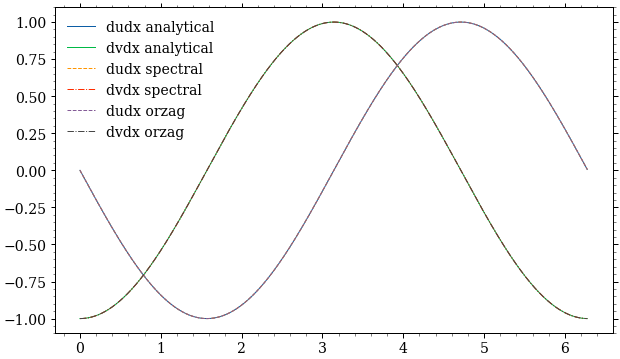

In [14]:
plt.plot(x, -np.sin(x), label='dudx analytical')
plt.plot(x, -np.cos(x), label='dvdx analytical')
plt.plot(x, ddx_spectral(u), '--', label='dudx spectral')
plt.plot(x, ddx_spectral(v), '-.', label='dvdx spectral')
plt.plot(x, ddx_orzag(u, v)[0], '--', label='dudx orzag')
plt.plot(x, ddx_orzag(u, v)[1], '-.', label='dvdx orzag')
plt.legend();